In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/bank-full.csv',sep=';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* There is not missing values
* 'Y' is our target variable in dataset

In [6]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

* Target is discret/categorical so it is a classification problem

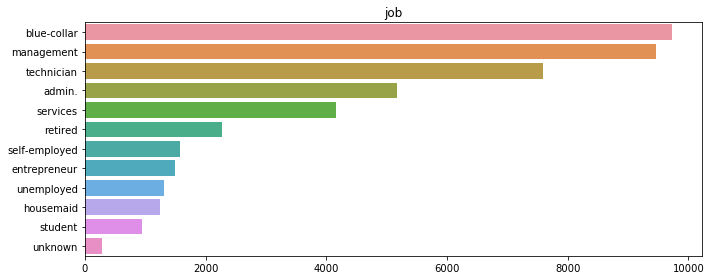

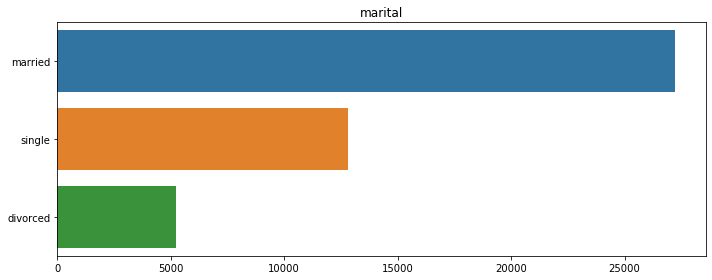

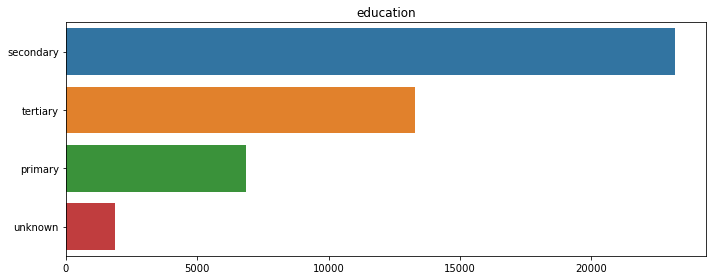

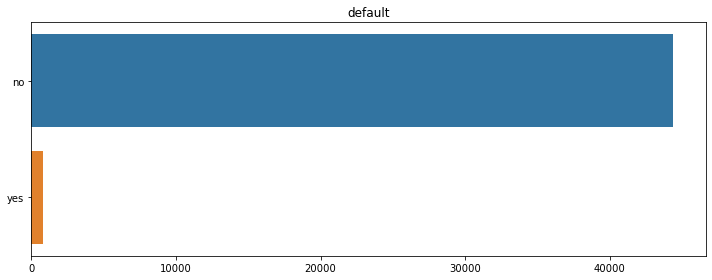

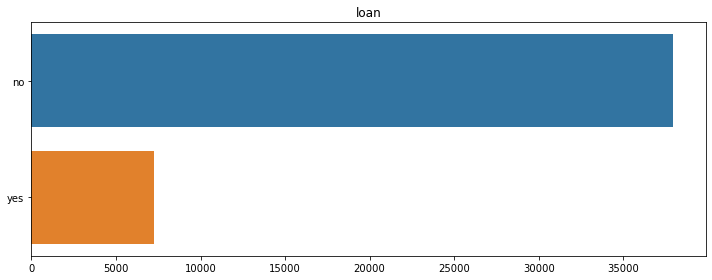

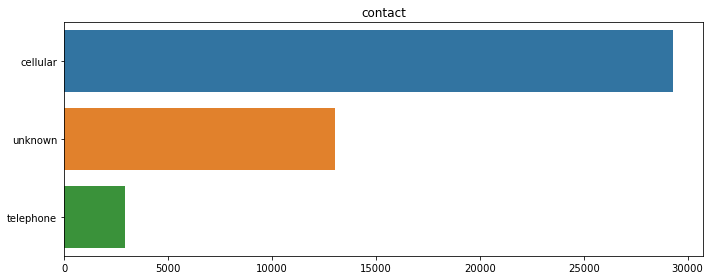

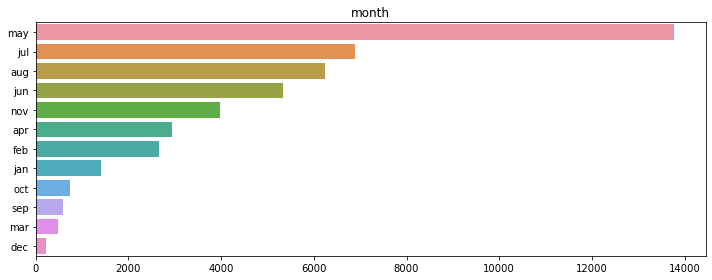

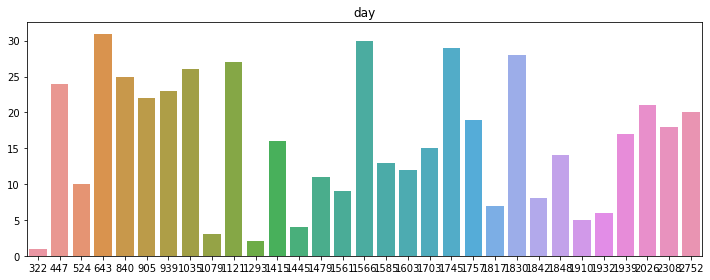

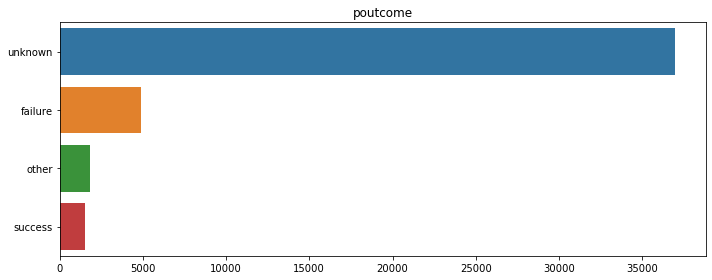

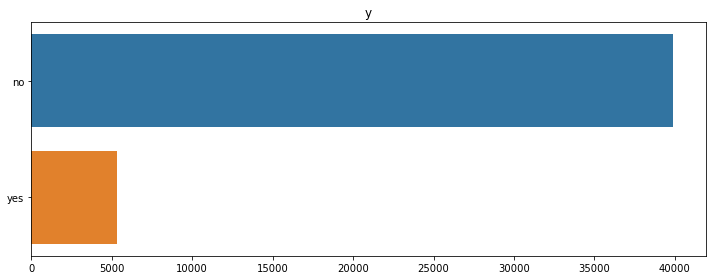

In [8]:
# Visualize useful information
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

* Convert Categorical values in numeric

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
cat_data = data.select_dtypes(include=['object'])

In [11]:
label_encoder=[]
for col in cat_data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(cat_data[col]) 

In [12]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [13]:
data.shape

(45211, 17)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
y            45211 non-null int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [15]:
# feature_data and target data
feature = data.drop(columns=['y'])
target = data.y

### Split the data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
trainX, testX, trainY, testY = train_test_split(feature,target)

### Use Wrapper Methods for feature Selection
* Using iterative process, we will try to figure out best subset of feature for ML algorithm giving best accuracy.

In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [19]:
for k in range(4,10):
    sfs = SequentialFeatureSelector(k_features=k, estimator=DecisionTreeClassifier())
    sfs.fit(trainX,trainY)
    print(k,sfs.k_score_,sfs.k_feature_names_)

4 0.8931224820196213 ('default', 'contact', 'campaign', 'poutcome')
5 0.8928275663639592 ('default', 'loan', 'contact', 'campaign', 'poutcome')
6 0.8923851972293567 ('marital', 'default', 'loan', 'contact', 'campaign', 'poutcome')
7 0.8907631872165582 ('marital', 'default', 'housing', 'loan', 'contact', 'campaign', 'poutcome')
8 0.8884628459721731 ('marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'poutcome')
9 0.8835377232106068 ('marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous', 'poutcome')


### Build the model

In [21]:
dt = DecisionTreeClassifier()

In [22]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [32]:
dt.score(testX,testY)

0.8718039458550827